In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
x = np.random.randint(0, 2, size=int(99600 * 0.2), dtype='uint8')

In [28]:
im = cv2.imread('investigation_data/dog.jpg')[..., 0]
im = cv2.resize(im, (256, 256))

In [30]:
def get_1_binary_plane(im):
    return np.bitwise_and(im, 1)

In [31]:
def insert_noise(im, idx, noise):
    im_flat = im.flatten().copy()
    chosen_pix = im_flat[idx]
    np.bitwise_and(chosen_pix, 254, out=chosen_pix)
    np.bitwise_or(chosen_pix, noise, out=chosen_pix)
    im_flat[idx] = chosen_pix
    return im_flat.reshape(im.shape)

In [32]:
im1 = insert_noise(im, np.random.permutation(int(99600 * 0.2)), np.random.randint(0, 2, size=int(99600 * 0.2), dtype='uint8'))
im2 = insert_noise(im, np.random.permutation(int(99600 * 0.4)), np.random.randint(0, 2, size=int(99600 * 0.4), dtype='uint8'))

In [42]:
im_plane0 = get_1_binary_plane(im)
im_plane1 = get_1_binary_plane(im1)
im_plane2 = get_1_binary_plane(im2)

In [43]:
fft0 = np.fft.fft2(im_plane0)
fft1 = np.fft.fft2(im_plane1)
fft2 = np.fft.fft2(im_plane2)

<AxesSubplot: >

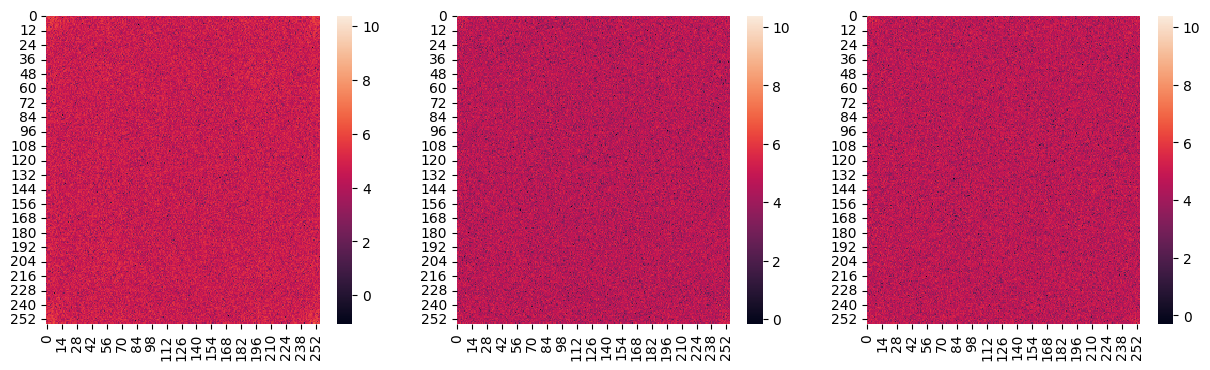

In [44]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.heatmap(np.log(np.abs(fft0)))
plt.subplot(1, 3, 2)
sns.heatmap(np.log(np.abs(fft1)))
plt.subplot(1, 3, 3)
sns.heatmap(np.log(np.abs(fft2)))

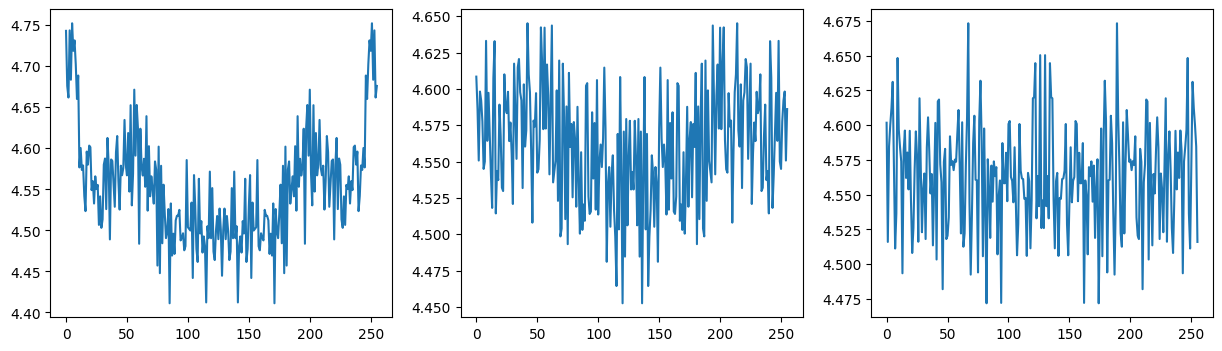

In [47]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(np.log(np.abs(fft0)).mean(axis=0))
plt.subplot(1, 3, 2)
plt.plot(np.log(np.abs(fft1)).mean(axis=0))
plt.subplot(1, 3, 3)
plt.plot(np.log(np.abs(fft2)).mean(axis=0))

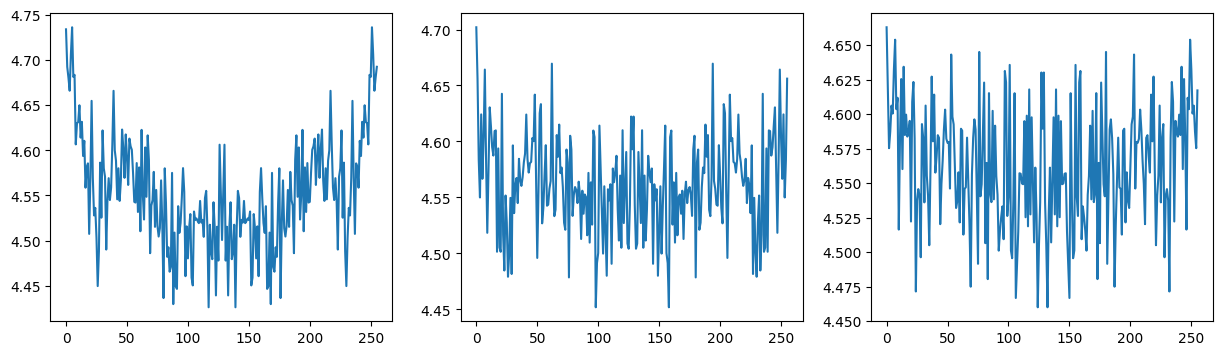

In [48]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(np.log(np.abs(fft0)).mean(axis=1))
plt.subplot(1, 3, 2)
plt.plot(np.log(np.abs(fft1)).mean(axis=1))
plt.subplot(1, 3, 3)
plt.plot(np.log(np.abs(fft2)).mean(axis=1))

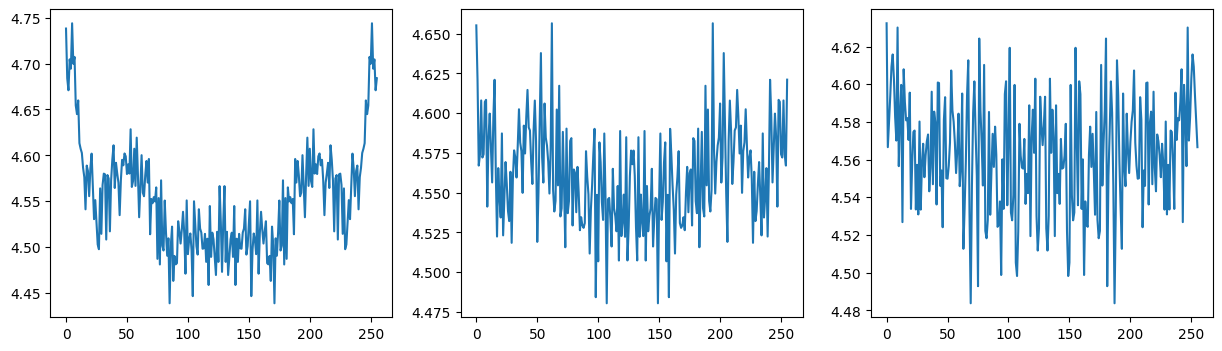

In [49]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot((np.log(np.abs(fft0)).mean(axis=1) + np.log(np.abs(fft0)).mean(axis=0))/2)
plt.subplot(1, 3, 2)
plt.plot((np.log(np.abs(fft1)).mean(axis=1) + np.log(np.abs(fft1)).mean(axis=0))/2)
plt.subplot(1, 3, 3)
plt.plot((np.log(np.abs(fft2)).mean(axis=1) + np.log(np.abs(fft2)).mean(axis=0))/2)